# Exam 1

## Problem 1

input a1, a2, a3: 0.5,1,4
input b1, b2, b3, b4: 1,4,2,3


f(x) - g(x) is cubic
left crit point: -2.18046042171637
right crit point: -0.15287291161696345
approximate solution found for f(x) - g(x) = 0: (-3.0677749613942735, 2.6645352591003757e-15)
approximate solution found for f(x) - g(x) = 0: (-0.8265826431596743, -2.220446049250313e-16)
approximate solution found for f(x) - g(x) = 0: (0.39435760442250883, 5.556017868002527e-10)


number of divisions (n) 20


area enclosed (1): 4.38227819987327
area enclosed (2): 0.8628652927336019
total area enclosed: 5.245143492606872


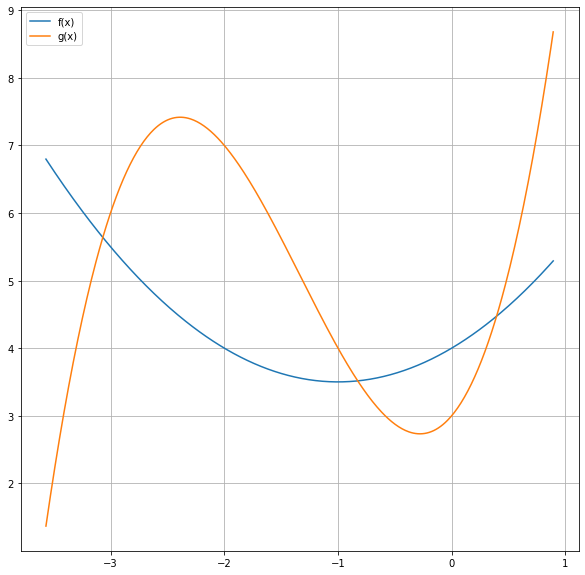

In [5]:
import matplotlib.pyplot as plt
#from sympy.solvers import solveset
#from sympy import Symbol
#from math import sqrt
import numpy as np

def trapSum(function, a, b, n):
    # approximates an integral via the trapezoidal sum method
    if abs(a-b) < 0.000001:
            print("bounds are approximately equal")
            return "None"
    try:
        increment    = (b - a) / n
        X = np.arange(a, b+increment, increment)
        total = 0
        for x in X[0:-1]:
            total += increment * (function(x) + function(x+increment)) * 0.5
        return total
    except:
        print("failed to approximate area")

def secantApproximation(h,a,b):
    for i in range(0,60):
        # get the x component of the midpoint of the line connecting f(a) and f(b)
        try: x = a-h(a)*((b-a)/(h(b)-h(a)))
        except:
            print("failed to approximate root")
            return None        
        # determine whether x should be the new lower or upper bound
        if h(a)*h(x) < 0:
            b = x
        elif h(b)*h(x) < 0:
            a = x
        elif h(x) == 0: # an exact solution would be nice
            print("exact solution found for f(x) - g(x) = 0:", (x,h(x)))
            return x
        else:
            print("failed to approximate root")
            return None
    print("approximate solution found for f(x) - g(x) = 0:", (x,h(x))) # after a certain number of iterations, our solution will be good enough
    return x

def findIntersectionPts(a1, a2, a3, b1, b2, b3, b4):
    # if f(x) - g(x) has more than one root, then there must be an enclosed space
    # we have three possible cases:
    # 1: f(x) - g(x) is linear, there's no enclosed space
    # 2: f(x) - g(x) is quadratic, finding the roots can be done analytically
    # 3: f(x) - g(x) is cubic, we derive the function to find extrema and approximate its roots
    
    # check to see what kinds of functions we are working with:
    orderF = 2
    if a1 == 0: orderF = 1
    orderG = 3
    if b1 == 0:
        orderG = 2
        if b2 == 0:
            orderG = 1
    
    # case 1
    if orderF == orderG == 1:
        print("Two lines, no enclosed area!")
        return []
    
    # if case 2 or 3, we will need the intersection function h(x) = f(x) - g(x)
    c1 = -b1
    c2 = a1 - b2
    c3 = a2 - b3
    c4 = a3 - b4
    
    # case 2
    # we don't need to do anything fancy, the intersection function is a quadratic
    if orderG != 3:
        print("f(x) - g(x) is quadratic")
        try: #try the quadratic formula: if it fails, we know there's not enough real roots
            a = c2
            b = c3
            c = c4
            intersect1 = (-b + (b**2 -4*a*c)**0.5) / (2*a)
            intersect2 = (-b - (b**2 -4*a*c)**0.5) / (2*a)
            if intersect1 == intersect2:
                print("One intersection, no enclosed area")
                return []
            print("We found two intersection points:", intersect1, intersect2)
            return [intersect1, intersect2]
        except:
            print("No intersections found, no enclosed area!")
            return []

    # case 3
    print("f(x) - g(x) is cubic")
    # we can solve a cubic with sympy, but we're not going to do that, because it's too easy
    """"
    x = Symbol('x')
    solved = [eval(solution) for solution in solveset(c1*(x**3) + c2*(x**2) + c3*x + c4)]
    try:
        print("cubic roots found:", solved)
        return solved
    except:
        print("no roots, no solution")
        return None
    """
    
    # h'(x) = ax^2 + bx + c
    a = 3*c1
    b = 2*c2
    c = c3
    
    # find critical points for intersection function (derivative is quadratic)
    criticalA = (-b + (b**2 -4*a*c)**0.5) / (2*a)
    criticalB = (-b - (b**2 -4*a*c)**0.5) / (2*a)
    
    # order the critical points, make sure they're real
    try:
        if criticalA < criticalB:
            criticalLeft = criticalA
            criticalRight = criticalB
        else:
            criticalLeft = criticalB
            criticalRight = criticalA
    except:
        print('No real intersection points!')
        return []
    
    # use the x-distance between the critical points to estimate where roots may lie
    distBetweenCrits = criticalRight - criticalLeft
    print("left crit point:", criticalLeft)
    print("right crit point:", criticalRight)
    
    # approximate the intersection points using our estimates and the secant method
    intersect1 = secantApproximation(h,criticalLeft - distBetweenCrits,criticalLeft)
    intersect2 = secantApproximation(h,criticalLeft,criticalRight)
    intersect3 = secantApproximation(h,criticalRight, criticalRight + distBetweenCrits)
    
    # output 1-3 intersection points for cubic
    output = []
    if intersect1 != None: output.append(intersect1)
    if intersect2 != None: output.append(intersect2)
    if intersect3 != None: output.append(intersect3)
    return output

# get inputs
a1, a2, a3     = eval(input("input a1, a2, a3:"))
b1, b2, b3, b4 = eval(input("input b1, b2, b3, b4:"))

# declare function h(x) = f(x) - g(x)
c1 = -b1
c2 = a1 - b2
c3 = a2 - b3
c4 = a3 - b4
h  = lambda x: c1*(x**3) + c2*(x**2) + c3*x + c4

# get intersection points
Pts = findIntersectionPts(a1,a2,a3,b1,b2,b3,b4)

# graph f(x) and g(x)
def graphRange(a,b,f,g):
    plt.figure(figsize=[10,10])
    X = np.arange(a,b,0.01)
    plt.plot(X,f(X),label='f(x)')
    plt.plot(X,g(X),label='g(x)')
    plt.grid()
    plt.legend()
    plt.show()

# calculate area based on the amount of intersections between f(x) and g(x)
# and graph the functions

f = lambda x: a1*(x**2) + a2*x + a3
g = lambda x: b1*(x**3) + b2*(x**2) + b3*x + b4

if len(Pts) == 2:
    n = int(input("number of divisions (n)"))
    print("area enclosed:", trapSum(h,Pts[0],Pts[1],n))
    graphRange(Pts[0]-0.5,Pts[1]+0.5,f,g)
elif len(Pts) == 3:
    n = int(input("number of divisions (n)"))
    area1 = abs(trapSum(h,Pts[0],Pts[1],n))
    print("area enclosed (1):", area1)
    area2 = abs(trapSum(h,Pts[1],Pts[2],n))
    print("area enclosed (2):", area2)
    print("total area enclosed:", area1+area2)
    graphRange(Pts[0]-0.5,Pts[2]+0.5,f,g)
else:
    print("No area enclosed!")
    graphRange(-3,3,f,g)

## Problem 3
"For this game, they shall use a generator of independent random numbers uniformly distributed between 0 and 1. The game starts with S = 0. The first player, Louise, adds to S different random numbers from the generator until S > 1 and records her last random number 'x'. The second player, Julie, continues adding to S different random numbers from the generator until S > 2 and records her last random number 'y'. The player with the highest number wins and the loser washes the dishes, i.e. if y > x the second player wins."
"What is the probability that the second player wins? Give your answer rounded to 10 places."

In [6]:
# I would need to simulate the game 10 billion times per experiment to get 10 decimal places!
# In addition to that, I probably want to run several experiments and average the results, so that I can control for random variation.
# Neither my computer nor this simple program are equipped for such a large task.
# Despite all that, my program TECHNICALLY works, and does prove that the game favors Player 2.

import random

iterations = 100000000
printEvery = 1000000

wins2  = 0
j=0
for i in range(0,iterations):
    S = 0
    while S < 1:
        x  = random.random()
        S += x
    while S < 2:
        y  = random.random()
        S += y
    if x < y: wins2  += 1
    j+=1
    if j==printEvery: #keep track of progress as it runs
        j=0
        print("Wins:", wins2, "", end="")

print()
print("We ran a grand total of",iterations,"games.")
print("Player 2 won",wins2,"times")
print("(Experimental) Probability of Player 2 winning:", wins2/iterations)

Wins: 527233 Wins: 1054708 Wins: 1582067 Wins: 2109678 Wins: 2637534 Wins: 3164699 Wins: 3691995 Wins: 4220048 Wins: 4747906 Wins: 5276364 Wins: 5804441 Wins: 6332108 Wins: 6858250 Wins: 7385224 Wins: 7913543 Wins: 8441199 Wins: 8969376 Wins: 9497259 Wins: 10025520 Wins: 10552732 Wins: 11080231 Wins: 11607464 Wins: 12135667 Wins: 12663339 Wins: 13191498 Wins: 13719394 Wins: 14247362 Wins: 14774564 Wins: 15303031 Wins: 15831299 Wins: 16359559 Wins: 16887303 Wins: 17415012 Wins: 17943116 Wins: 18471196 Wins: 18998518 Wins: 19527194 Wins: 20055279 Wins: 20583121 Wins: 21110609 Wins: 21637201 Wins: 22165826 Wins: 22693925 Wins: 23220668 Wins: 23747155 Wins: 24274401 Wins: 24801757 Wins: 25329304 Wins: 25856818 Wins: 26384558 Wins: 26911924 Wins: 27439345 Wins: 27967112 Wins: 28493961 Wins: 29021786 Wins: 29549394 Wins: 30076788 Wins: 30603828 Wins: 31131271 Wins: 31657967 Wins: 32186360 Wins: 32713257 Wins: 33240290 Wins: 33769166 Wins: 34297228 Wins: 34824361 Wins: 35351987 Wins: 35879513